In [41]:
import pandas
import numpy
import matplotlib.pyplot as plt


In [42]:
# load dataset
dataframe = pandas.read_csv("data/recordsTestingPlainAfterEpoch.csv", header=0)
dataframe2 = pandas.read_csv("data/recordsTestingPlain.csv", header=0)

dataframeS = pandas.read_csv("data/recordsTestingPlainTop100AfterEpoch.csv", header=0)
goDataframe = pandas.read_csv("data/go_Random400Results.csv", header=0)



In [4]:
dataframe.head(400)

,project,status,reproducibleVariants,nonReproducibleVariants,stars
0,blackduck,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,78
1,five-localsitemanager,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,1
2,courseraoauth2client,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,4
3,nextstrain-cli,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,25
4,lastversion,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,272
...,...,...,...,...,...
395,prettierfier,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,-1
396,prestige-irc,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,-1
397,plyara,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,-1
398,plone-app-locales,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,-1


In [5]:
dataframe2.head(400)

,project,status,reproducibleVariants,nonReproducibleVariants,stars
0,aiogtts,Not Reproducible,['build_path'; 'user_group.available+=buildus...,['environment'; 'fileordering'; 'kernel'; 'ex...,7
1,aiogtts,Not Reproducible,['build_path'; 'user_group.available+=buildus...,['environment'; 'fileordering'; 'kernel'; 'ex...,7
2,aiohttp-retry,Not Reproducible,['build_path'; 'user_group.available+=buildus...,['environment'; 'home'; 'locales'; 'time'; 't...,192
3,aionotify,Not Reproducible,['environment'; 'user_group.available+=buildu...,['build_path'; 'home'; 'kernel'; 'locales'; '...,115
4,albumentations,Not Reproducible,['user_group.available+=builduser:builduser'],['environment'; 'build_path'; 'fileordering';...,12261
...,...,...,...,...,...
358,pip-with-requires-python,Fully Reproducible,['all'],[],-1
359,django-url-shortening,Fully Reproducible,['all'],[],-1
360,mdt,Not Reproducible,['user_group.available+=builduser:builduser'],['environment'; 'build_path'; 'fileordering';...,-1
361,python-gvm,Fully Reproducible,['all'],[],-1


In [6]:
dataframeS.head(400)

,project,status,reproducibleVariants,nonReproducibleVariants,stars
0,psutil,Partially Reproducible,['environment'; 'fileordering'; 'home'; 'kern...,['build_path'; 'user_group.available+=buildus...,9348
1,psutil-wheels,Partially Reproducible,['environment'; 'fileordering'; 'home'; 'kern...,['build_path'; 'user_group.available+=buildus...,9348
2,ppdiffusers,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,9453
3,paddlenlp,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,9453
4,tool-helpers,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,9453
5,faster-tokenizers,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,9453
6,faster-tokenizer,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,9453
7,fast-tokenizer-python,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,9453
8,paddle-pipelines,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,9453
9,visdom,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,9460


In [43]:
goDataframe.head(400)

,project,status,reproducibleVariants,nonReproducibleVariants,stars
0,github.com/nsf/termbox-go,Fully Reproducible,['all'],[],4291
1,github.com/vishvananda/netlink,Fully Reproducible,['all'],[],2368
2,github.com/blang/semver,Fully Reproducible,['all'],[],880
3,github.com/julienschmidt/httprouter,Fully Reproducible,['all'],[],15139
4,github.com/googleapis/gnostic,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,1440
...,...,...,...,...,...
395,github.com/syndtr/goleveldb,Not Reproducible,[],['environment'; 'build_path'; 'user_group.ava...,5744
396,github.com/hashicorp/vault,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,27976
397,github.com/mattn/goveralls,Partially Reproducible,['environment'; 'build_path'; 'fileordering';...,['user_group.available+=builduser:builduser';...,757
398,github.com/creack/pty,Fully Reproducible,['all'],[],1412


In [48]:
dataframe.describe()

,stars
count,400.000000
mean,430.070000
std,1194.762654
min,-1.000000
25%,0.000000
50%,22.000000
75%,244.250000
max,10186.000000


In [44]:
goDataframe.describe()

,stars
count,400.000000
mean,6201.870000
std,10553.378478
min,14.000000
25%,679.250000
50%,2263.000000
75%,5478.000000
max,69835.000000


In [8]:
dataframe2.describe()

,stars
count,363.000000
mean,345.829201
std,1465.756661
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,55.000000
max,16621.000000


In [9]:
dataframeS.describe()

,stars
count,48.000000
mean,50725.687500
std,44117.998543
min,9348.000000
25%,9540.000000
50%,39267.000000
75%,84214.500000
max,121630.000000


In [46]:
# Remove space from dataframe keys strings
dataframe.columns = dataframe.columns.str.replace(' ', '')
dataframe2.columns = dataframe2.columns.str.replace(' ', '')
dataframeS.columns = dataframeS.columns.str.replace(' ', '')
goDataframe.columns = goDataframe.columns.str.replace(' ', '')



In [68]:
dataframe['status'].value_counts()

Series([], Name: status, dtype: int64)

In [94]:
dataframeS['status'].value_counts()

 Partially Reproducible    48
Name: status, dtype: int64

In [88]:
dataframe2['status'].value_counts()

 Not Reproducible      303
 Fully Reproducible     60
Name: status, dtype: int64

In [67]:
goDataframe['status'].value_counts()

 Fully Reproducible        309
 Not Reproducible           70
 Partially Reproducible     21
Name: status, dtype: int64

In [96]:
# List of Partially Reproducible projects Go
goDataframe.loc[goDataframe['status'].str.strip() == 'Fully Reproducible']

,project,status,reproducibleVariants,nonReproducibleVariants,stars
0,github.com/nsf/termbox-go,Fully Reproducible,['all'],[],4291
1,github.com/vishvananda/netlink,Fully Reproducible,['all'],[],2368
2,github.com/blang/semver,Fully Reproducible,['all'],[],880
3,github.com/julienschmidt/httprouter,Fully Reproducible,['all'],[],15139
5,github.com/antchfx/xpath,Fully Reproducible,['all'],[],548
...,...,...,...,...,...
391,github.com/klauspost/cpuid,Fully Reproducible,['all'],[],834
392,github.com/spf13/cobra,Fully Reproducible,['all'],[],32423
393,github.com/mitchellh/go-homedir,Fully Reproducible,['all'],[],930
398,github.com/creack/pty,Fully Reproducible,['all'],[],1412


In [87]:
from pandas import DataFrame


 # goDataframe

# dataframe = goDataframe
# Create a distrubution plot for nonReproducibleVaraints and reproducibleVariants in each package in the dataset


distrubutionDf = DataFrame(columns=['variant', 'nonReproducibleVariants', 'reproducibleVariants'])





for i in range(len(dataframe)):
    if (dataframe.iloc[i]['status']).strip() == 'Not Reproducible':
        nonRepr = dataframe.iloc[i]['nonReproducibleVariants'].strip().replace('[', '').replace(']', '').replace("'", '').split('; ')
        repr = dataframe.iloc[i]['reproducibleVariants'].strip().replace('[', '').replace(']', '').replace("'", '').split('; ')

        for j in nonRepr:
        # Check if row with variant j exists
            if distrubutionDf.loc[distrubutionDf['variant'] == j].empty:
                # Create row
                distrubutionDf = distrubutionDf.append({'variant': j, 'nonReproducibleVariants': 1, 'reproducibleVariants': 0}, ignore_index=True)
            else:
                # Update row
                distrubutionDf.loc[distrubutionDf['variant'] == j, 'nonReproducibleVariants'] += 1

        for j in repr:
            # Check if row with variant j exists
            if distrubutionDf.loc[distrubutionDf['variant'] == j].empty:
                # Create row
                distrubutionDf = distrubutionDf.append({'variant': j, 'nonReproducibleVariants': 0, 'reproducibleVariants': 1}, ignore_index=True)
            else:
                # Update row
                distrubutionDf.loc[distrubutionDf['variant'] == j, 'reproducibleVariants'] += 1

distrubutionDf.head(100)

# Remove rows with variant 'None'
distrubutionDf = distrubutionDf.loc[distrubutionDf['variant'] != '']



/var/folders/z7/l3tqryp965xchvhwv8_pdw340000gn/T/ipykernel_3077/3898126430.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distrubutionDf = distrubutionDf.append({'variant': j, 'nonReproducibleVariants': 1, 'reproducibleVariants': 0}, ignore_index=True)
/var/folders/z7/l3tqryp965xchvhwv8_pdw340000gn/T/ipykernel_3077/3898126430.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distrubutionDf = distrubutionDf.append({'variant': j, 'nonReproducibleVariants': 1, 'reproducibleVariants': 0}, ignore_index=True)
/var/folders/z7/l3tqryp965xchvhwv8_pdw340000gn/T/ipykernel_3077/3898126430.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distrubutionDf = distrubutionDf.append({'variant': j, 'nonReproducibleVariants': 1, 're

In [85]:
print(distrubutionDf)

                                      variant nonReproducibleVariants  \
0   user_group.available+=builduser:builduser                      21   
1                                        home                      21   
2                                 environment                       0   
3                                  build_path                       0   
4                                fileordering                       0   
5                                      kernel                       0   
6                                     locales                       0   
7                                   exec_path                       0   
8                                        time                       0   
9                                    timezone                       0   
10                                      umask                       0   

   reproducibleVariants  
0                     0  
1                     0  
2                    21  
3                  

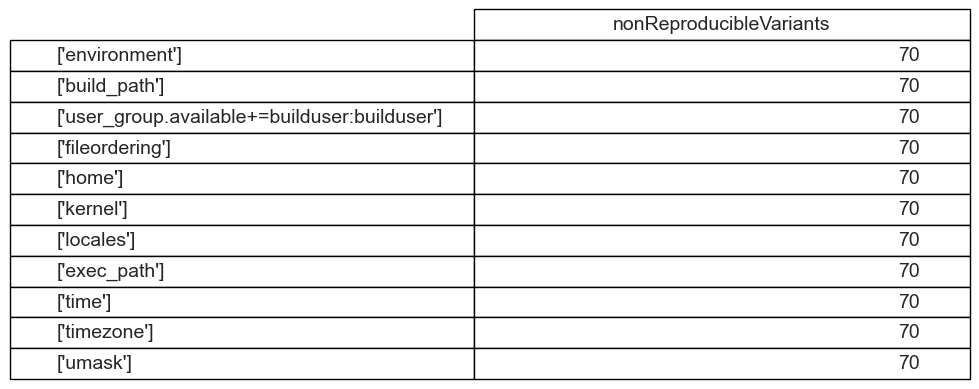

In [88]:
import seaborn as sns

# Plot the distrubution of nonReproducibleVariants and reproducibleVariants as separate tables to show the distribution of variants
# sns.set_theme(style="whitegrid")

# Draw a simple table to show the distrubution of nonReproducibleVariants
# sns.scatterplot(data=distrubutionDf, x="variant", y="nonReproducibleVariants", hue="nonReproducibleVariants", size="nonReproducibleVariants", sizes=(20, 200))

table = plt.table(cellText=distrubutionDf['nonReproducibleVariants'].values.reshape(-1, 1), colLabels=['nonReproducibleVariants'], rowLabels=distrubutionDf['variant'].values.reshape(-1, 1), loc='center', bbox=[0, 0, 1, 1])
#
table.set_fontsize(14)
table.scale(1, 2)

plt.axis('off')
plt.show()



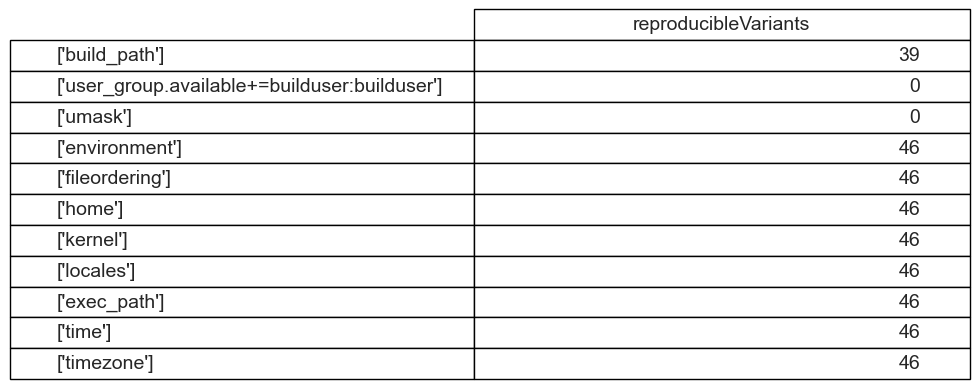

In [54]:
# Draw a simple table to show the distrubution of reproducibleVariants
# sns.scatterplot(data=distrubutionDf, x="variant", y="reproducibleVariants", hue="reproducibleVariants", size="reproducibleVariants", sizes=(20, 200))

table = plt.table(cellText=distrubutionDf['reproducibleVariants'].values.reshape(-1, 1), colLabels=['reproducibleVariants'], rowLabels=distrubutionDf['variant'].values.reshape(-1, 1), loc='center', bbox=[0, 0, 1, 1])

table.set_fontsize(14)
table.scale(1, 2)

plt.axis('off')

plt.show()


In [27]:
# Show projects that had exact same variants in nonReproducibleVariants list
# dataframe.head(400)

# Filter dataframe to only show projects that had exact same variants in nonReproducibleVariants list ['variant1', 'variant2', 'variant3', ...]
dataframe = dataframe.loc[dataframe['nonReproducibleVariants'].str.contains('umask')]
dataframe.head(400)



KeyError: 'nonReproducibleVariants'

In [167]:

dfr = dataframe.loc[dataframe['status'] == 'Success']
dfr = dfr.loc[dfr['diffoscope'] != '├── file list']

# make diffoscope column a list by spliting after "├── file list"
dfr['diffoscope'] = dfr['diffoscope'].str.split('├── file list ')

# dfr = dfr.loc[len(list(dfr['diffoscope'])) > 1]

# dfr['diffoscope'] = dfr['diffoscope'].apply(lambda x: x[1:])
# dfr['diffoscope'] = dfr['diffoscope'].apply(lambda x: list(x)[0].split())

# dfr = dfr.loc[dfr['diffoscope'].apply(lambda x: len(x) < 2)]

# dfr['count'] = dfr['diffoscope'].apply(lambda x: len(x))


print(len(dfr))

# # Plot the number of packages that have a diffoscope output that is not just "├── file list" table
# fig, ax = plt.subplots()
#
# # hide axes
# fig.patch.set_visible(False)
# ax.axis('off')
# ax.axis('tight')
#
#
# ax.table(cellText=dfr['count'].values.reshape(-1, 1), colLabels=['Number of files'], rowLabels=dfr['name'].values.reshape(-1, 1), loc='center')
#
# fig.tight_layout()
#
# plt.show()


236


712
267
84
208
137


<BarContainer object of 4 artists>

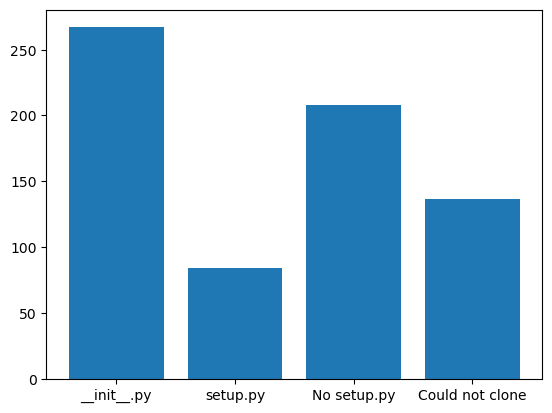

In [168]:
dfra = dataframe.loc[dataframe['status'] == 'Failed']

print(len(dfra))
# Check for errors involving __init__.py and setup.py not found
dfra = dfra['error'].apply(lambda x: str(x))


# dfr = dfra.loc[dfra['error'] in 'No version found after checking __init__.py']

dfra1 = dfra.loc[dfra.str.contains('No version found after checking __init__.py')]
dfra2 = dfra.loc[dfra.str.contains('No version found in setup.py')]
dfra4 = dfra.loc[dfra.str.contains('No setup.py found')]
dfra3 = dfra.loc[dfra.str.contains('Could not clone the repo')]
# dfra4 = dfra.loc[dfra == "NA"]

print(len(dfra1))
print(len(dfra2))
print(len(dfra3))
print(len(dfra4))


# Graph the length of dfra1, dfra2, dfra3, dfra4
plt.bar(['__init__.py', 'setup.py', 'No setup.py', 'Could not clone'], [len(dfra1), len(dfra2), len(dfra3), len(dfra4)])